In [1]:
import os
import os.path as osp

import sys
sys.path.append("..")

import core

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0368, 0.0369, 0.0368],
        [0.0275, 0.0275, 0.0276,  ..., 0.0373, 0.0373, 0.0372],
        [0.0273, 0.0275, 0.0276,  ..., 0.0379, 0.0378, 0.0377],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       dtype=torch.float64) tensor([0.0000, 0.0187, 0.0192,  ..., 0.9828, 0.9851, 1.0000],
       dtype=torch.float64)


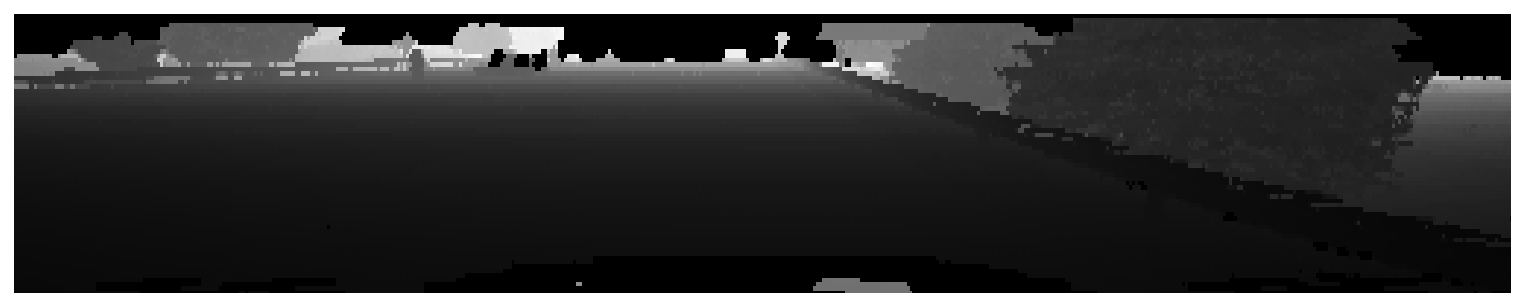

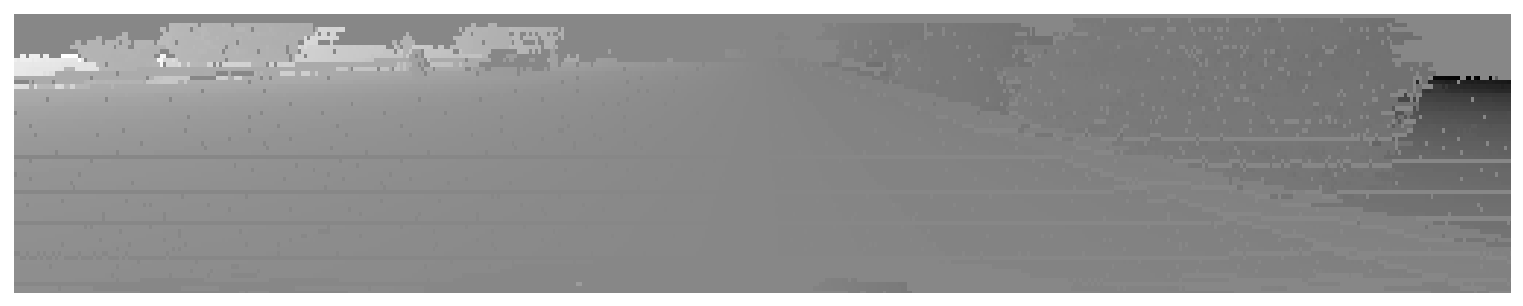

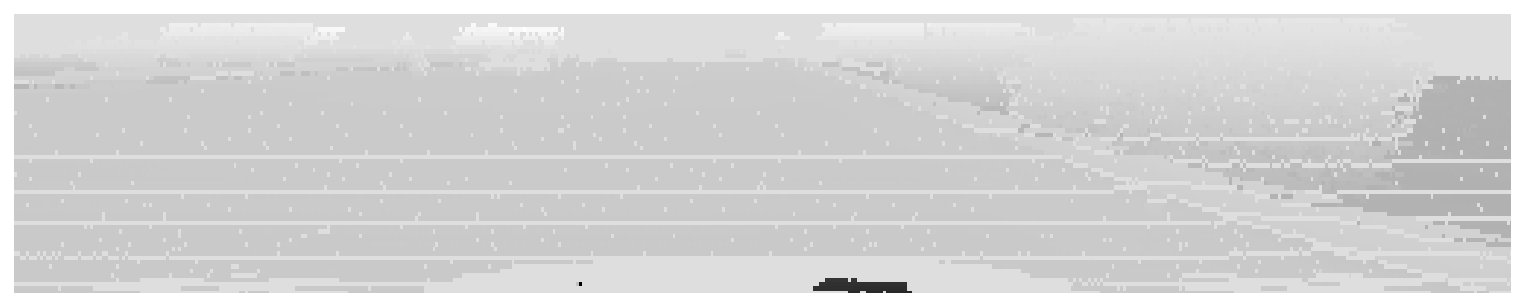

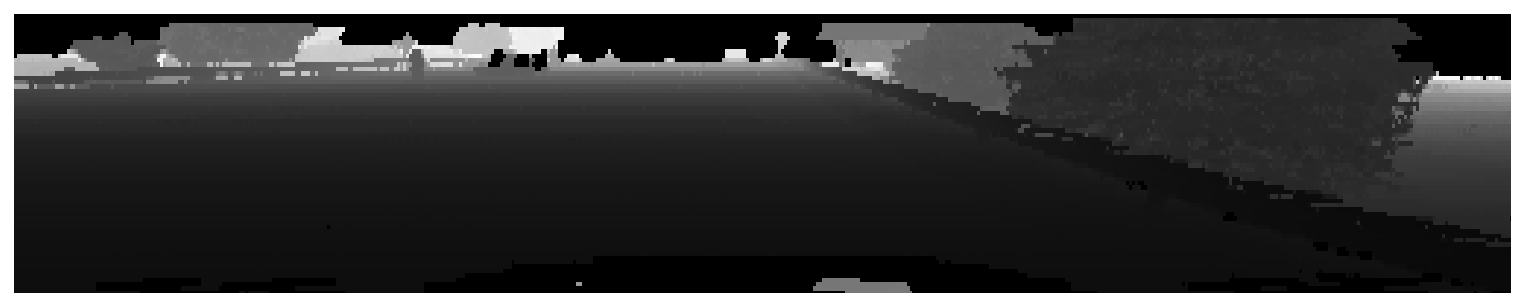

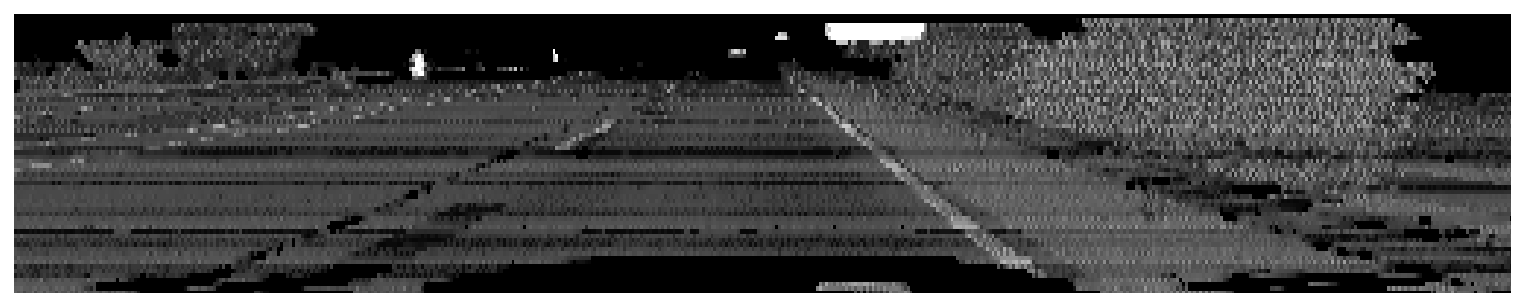

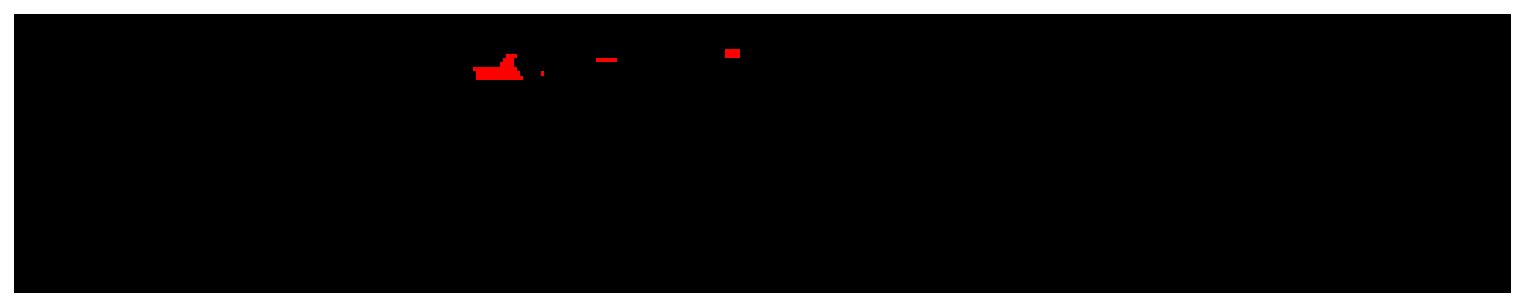

In [2]:
import sys
sys.path.append("..")

import torch
import torch.utils.data
import numpy as np

import matplotlib.pyplot as plt

import core

def visualize(fmap: np.ndarray, pallete: dict):
    img = np.zeros((*fmap.shape[:2], 3), dtype=np.uint8)
    for idx, (cls_name, color) in enumerate(pallete.items()):
        img[fmap == idx] = np.array(color)
    return img


conf_dataset = core.readconfyaml.read("../conf/data.yaml")
train_dataset = core.dataset.KITTISpherical(
    "../data", "train", conf_dataset
)
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=1,
    shuffle=True,
    num_workers=4
)


# for idx, (cls_name, color) in enumerate(conf_dataset.pallete.items()):
#     print(f"{idx} {cls_name}: {color}")

def show_spherical_proj(img: np.ndarray):
    plt.figure(figsize=(12, 6), dpi=128, tight_layout=True)
    plt.axis([512, 0, 0, 64])
    plt.axis("off")
    plt.imshow(img, cmap="gray", aspect=1.5, interpolation='nearest')
for iter, (fmap, gdth) in enumerate(train_loader):
    sample = fmap[0]
    print(sample[0], torch.unique(sample[0]))
    show_spherical_proj(sample[0]) # x
    show_spherical_proj(sample[1]) # y
    show_spherical_proj(sample[2]) # z
    show_spherical_proj(sample[3]) # d
    show_spherical_proj(sample[4]) # i
    show_spherical_proj(visualize(gdth[0], conf_dataset.pallete))

    break

In [3]:
import torch
import torch.nn as nn

# 假设输入特征图的形状为 (batch_size, channels, 4, 64)
batch_size = 1  # 假设 batch_size 为 1
channels = 3    # 假设输入通道数为 3
input_height = 4
input_width = 4

# 创建输入特征图
input_tensor = torch.randn(batch_size, channels, input_height, input_width)

# 定义转置卷积层
# 输入通道数为 channels，输出通道数为 out_channels
out_channels = 1  # 输出通道数可以根据需要调整
transpose_conv = nn.ConvTranspose2d(
    in_channels=channels,
    out_channels=out_channels,
    kernel_size=4,
    stride=2,
    padding=0
)
# out = (n - 1) * stride - 2 * padding + kernel_size

# 执行转置卷积
output_tensor = transpose_conv(input_tensor)

# 输出结果的形状
print("输出特征图的形状:", output_tensor.shape)

输出特征图的形状: torch.Size([1, 1, 10, 10])


In [1]:
import sys
sys.path.append("..")

import core

import torch.utils.data

kittisem = core.dataset.KITTISemantic(
    root="../data/kittisem",
    seq_list=["00", "01", "02"]
)

dataloader = torch.utils.data.DataLoader(
    dataset=kittisem,
    batch_size=4,
    shuffle=True
)

for iter, (data, gdth) in enumerate(kittisem):
    print(data.shape, gdth.shape)
    break

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
(122577, 4) (122577,)


In [8]:
from tabulate import tabulate

# 示例数据
data = [
    {0: "Alice", "Age": 24, "Occupation": 0.0000003},
    {0: "Bob", "Age": 30, "Occupation": "Doctor"},
    {0: "Charlie", "Age": 22, "Occupation": "Artist"}
]

# 打印表格
print(tabulate(data, headers="keys", tablefmt="fancy_grid"))

╒═════════╤═══════╤══════════════╕
│ 0       │   Age │ Occupation   │
╞═════════╪═══════╪══════════════╡
│ Alice   │    24 │ 3e-07        │
├─────────┼───────┼──────────────┤
│ Bob     │    30 │ Doctor       │
├─────────┼───────┼──────────────┤
│ Charlie │    22 │ Artist       │
╘═════════╧═══════╧══════════════╛
